# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Lets Understand some of the most Interesting Patterns of Funding and Startups.

**How Does the Funding Ecosystem changes with respect to Time?**

**What is the General Amount that Startups get in India?**

**Which Kind of Industries are more preferred for Startups?**

**Does Location also play a role, In determining the Growth of a Startup?**

**Who plays the main role in Indian Startups Ecosystem?**

**What are the different Types of Funding for Startups?**

# Data Reading & Cleaning

In [1]:
# import some usefull libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

%matplotlib inline

In [2]:
# import data
df0 = pd.read_csv('startup_funding.csv')

# create a copy
df = df0.copy()

In [3]:
# show first five rows
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [6]:
# create a copy
df = df0.copy()

# drop columns that are not needed
df = df.drop(columns=['Remarks', 'Sr No'])

# set the name of columns accordingly
df.columns = ['Date', 'Startup Name', 'Industry Vertical', 'SubVertical', 'Location', 
              'Investors Name', 'Investment Type', 'Funding']

# Regulation on the Funding column
df.loc[109, 'Funding'] = '14,342,000' 
df['Funding'] = df['Funding'].astype('str')

for i in range(len(df['Funding'])):   
    if df['Funding'][i][0].isdigit() == True:
        df.loc[i, 'Funding'] = float(df['Funding'][i].replace(',', ''))
    else:
        df.loc[i, 'Funding'] = np.nan
        
df['Funding'] = df['Funding'].astype('float')

# change to correct format of some date values
wrong_indexes = [192, 2571, 2606, 2775, 2776, 2831, 3011, 3029]
correct_values = ['05/07/2018', '01/07/2015', '10/07/2015', '12/05/2015', '12/05/2015',
 '13/04/2015', '15/01/2015', '22/01/2015']
df.loc[wrong_indexes, 'Date'] = correct_values

# set the type of date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# create some time columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()  

# drop rows that are null of Funding column
index_null = df[df['Funding'].isnull() == True].index
df = df.drop(index=index_null).reset_index(drop=True)

# apply lower() to these columns: ['Industry Vertical', 'Location', 'Investment Type']
col_list = df.columns[[1, 2, 4, 6]]
for i in range(len(col_list)):
    df[col_list[i]] = df[col_list[i]].str.lower()
    
# regulation on the Location column
df['Location'] = df['Location'].replace(['bengaluru', 'sfo / bangalore', 'kormangala'], 'bangalore')
df['Location'] = df['Location'].replace('delhi', 'new delhi')
df['Location'] = df['Location'].replace('ahemadabad', 'ahmedabad')
df['Location'] = df['Location'].replace('gurgaon', 'gurugram')
df['Location'] = df['Location'].replace(['india / us', 'usa/india', 'us/india', 'india / us', 'india/us'], 'india / us')
df['Location'] = df['Location'].replace('pune/seattle', 'pune / seattle')
df['Location'] = df['Location'].replace('bangalore/ bangkok', 'bangalore / bangkok')
df['Location'] = df['Location'].replace('hyderabad/usa', 'hyderabad / usa')
df['Location'] = df['Location'].replace('india/singapore', 'india / singapore')
df['Location'] = df['Location'].replace('new york, bengaluru', 'new york / bengaluru')
df['Location'] = df['Location'].replace('delhi & cambridge', 'delhi / cambridge')
df['Location'] = df['Location'].replace('mumbai/bengaluru', 'mumbai / bengaluru')
df['Location'] = df['Location'].replace('new york/ india', 'new york / india')
df['Location'] = df['Location'].replace('san jose,', 'san jose')

# regulation on the Industry Vertical column
food_industry = ['food and beverage', 'food & beverages', 'food & beverage', 'food and beverages', 'foodtech', 'fusion beverages', 'food-tech', 'food', 'food tech', 'online food delivery', 'online food ordering & delivery service', 'online food ordering & delivery platform', 'food delivery platform']
financial_service = ['financial services', 'finance', 'fin-tech', 'fintech', 'fiinance', 'financial tech', 'accounting', 'investment', 'finance company', 'rural fintech']
education = ['edtech', 'edutech', 'education', 'e-tech', 'online education', 'deep-tech', 'clean-tech', 'ed-tech', 'online education platform']
transportation = ['travel tech', 'travel and tourism', 'transportation', 'transport', 'last mile transportation']
gaming_entertainment = ['gaming and entertainment', 'online gaming', 'ott player', 'video customer experience(cx) platform', 'video games', 'gaming']
customer_services = ['consumer internet', 'consumer interne', 'consumer appliances', 'consumer technology', 'consumer portal', 'customer service', 'customer service platform', 'hyperlocal handyman services', 'hyper-local online/mobile grocery', 'home services marketplace', 'services']
it = ['software company', 'information technology and services', 'information technology', 'it', 'tech', 'technology provider', 'digital solutions']
e_commerce = ['e-commerce', 'ecommerce', 'commerce and shopping', 'ecommece', 'e-commerce & m-commerce platform', 'ecommerce marketplace']
health = ['healthcare', 'health', 'hospitality', 'health and wellness', 'health care', 'healthtech', 'health-tech platform', 'healthcare mobile app']
logistics = ['logistics solution provider', 'supply chain', 'logistics tech', 'hyper-local logistics', 'logistics', 'logistics tech platform']
social_media = ['social media', 'marketplace', 'online marketplace', 'content management', 'media', 'digital media', 'b2b', 'b2b platform', 'b2b marketing']

df['Industry Vertical'] = df['Industry Vertical'].replace(food_industry, 'Food Industry')
df['Industry Vertical'] = df['Industry Vertical'].replace(financial_service, 'Financial Services')
df['Industry Vertical'] = df['Industry Vertical'].replace(education, 'Education')
df['Industry Vertical'] = df['Industry Vertical'].replace(transportation, 'Transportation')
df['Industry Vertical'] = df['Industry Vertical'].replace(gaming_entertainment, 'Gaming & Entertainment')
df['Industry Vertical'] = df['Industry Vertical'].replace(customer_services, 'Customer Services')
df['Industry Vertical'] = df['Industry Vertical'].replace(it, 'Information Technology')
df['Industry Vertical'] = df['Industry Vertical'].replace(e_commerce, 'E-Commerce')
df['Industry Vertical'] = df['Industry Vertical'].replace(health, 'Health')
df['Industry Vertical'] = df['Industry Vertical'].replace(logistics, 'Logistics')
df['Industry Vertical'] = df['Industry Vertical'].replace(food_industry, 'Food Endustry')
df['Industry Vertical'] = df['Industry Vertical'].replace(social_media, 'Social Media')
df['Industry Vertical'] = df['Industry Vertical'].replace('technology', 'Technology')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2066 non-null   datetime64[ns]
 1   Startup Name       2066 non-null   object        
 2   Industry Vertical  1935 non-null   object        
 3   SubVertical        1419 non-null   object        
 4   Location           1931 non-null   object        
 5   Investors Name     2046 non-null   object        
 6   Investment Type    2063 non-null   object        
 7   Funding            2066 non-null   float64       
 8   Year               2066 non-null   int64         
 9   Month              2066 non-null   object        
 10  Day                2066 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 177.7+ KB


In [8]:
df.isnull().sum()

Date                   0
Startup Name           0
Industry Vertical    131
SubVertical          647
Location             135
Investors Name        20
Investment Type        3
Funding                0
Year                   0
Month                  0
Day                    0
dtype: int64

In [9]:
df.head()

,Date,Startup Name,Industry Vertical,SubVertical,Location,Investors Name,Investment Type,Funding,Year,Month,Day
0,2020-01-09,byju’s,Education,E-learning,bangalore,Tiger Global Management,private equity round,200000000.0,2020,January,Thursday
1,2020-01-13,shuttl,Transportation,App based shuttle service,gurugram,Susquehanna Growth Equity,series c,8048394.0,2020,January,Monday
2,2020-01-09,mamaearth,E-Commerce,Retailer of baby and toddler products,bangalore,Sequoia Capital India,series b,18358860.0,2020,January,Thursday
3,2020-01-02,https://www.wealthbucket.in/,Financial Services,Online Investment,new delhi,Vinod Khatumal,pre-series a,3000000.0,2020,January,Thursday
4,2020-01-02,fashor,fashion and apparel,Embroiled Clothes For Women,mumbai,Sprout Venture Partners,seed round,1800000.0,2020,January,Thursday


# How Does the Funding Ecosystem changes with respect to Time?

In [10]:
grp_year = df.groupby('Year')['Funding'].count()

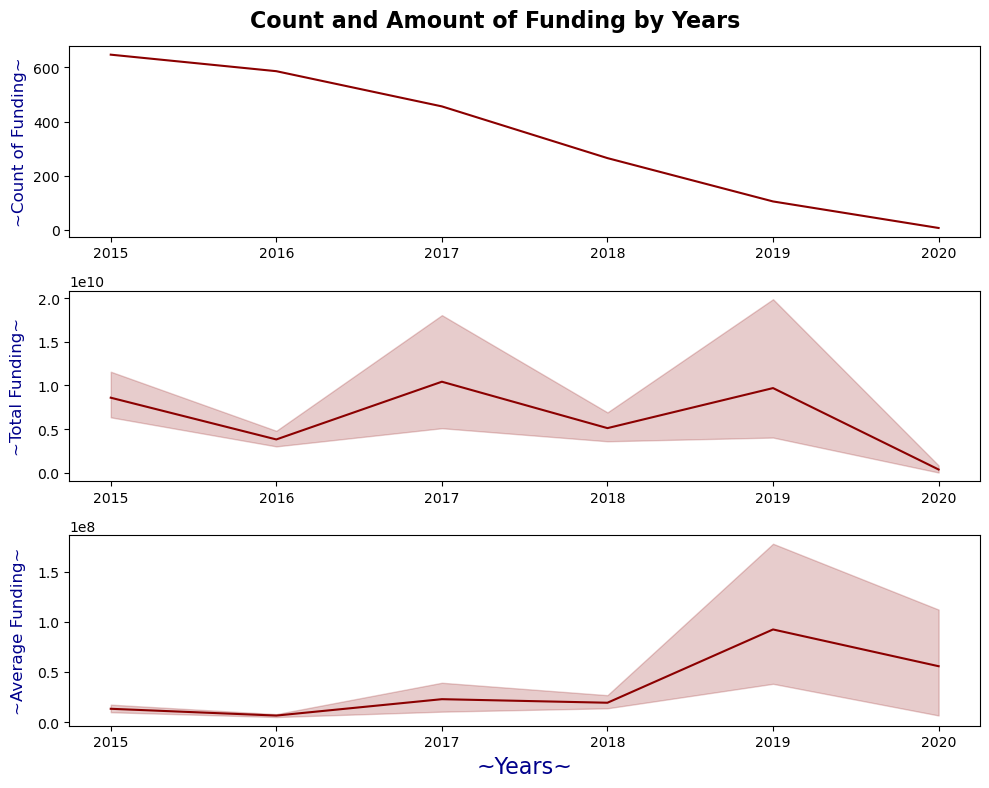

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

sns.lineplot(x=grp_year.index, y=grp_year.values, ax=ax[0], color='darkred')
sns.lineplot(data=df, x='Year', y='Funding', ax=ax[1], estimator='sum', color='darkred')
sns.lineplot(data=df, x='Year', y='Funding', ax=ax[2], estimator='mean', color='darkred')

ax[0].set_xlabel('')
ax[0].set_ylabel('~Count of Funding~', fontsize=12, color='darkblue')
ax[1].set_xlabel('')
ax[1].set_ylabel('~Total Funding~', fontsize=12, color='darkblue', labelpad=9)
ax[2].set_xlabel('~Years~', fontsize=16, color='darkblue')
ax[2].set_ylabel('~Average Funding~', fontsize=12, color='darkblue', labelpad=8)


fig.suptitle('Count and Amount of Funding by Years', weight='bold', fontsize=16)

plt.tight_layout()

plt.show()

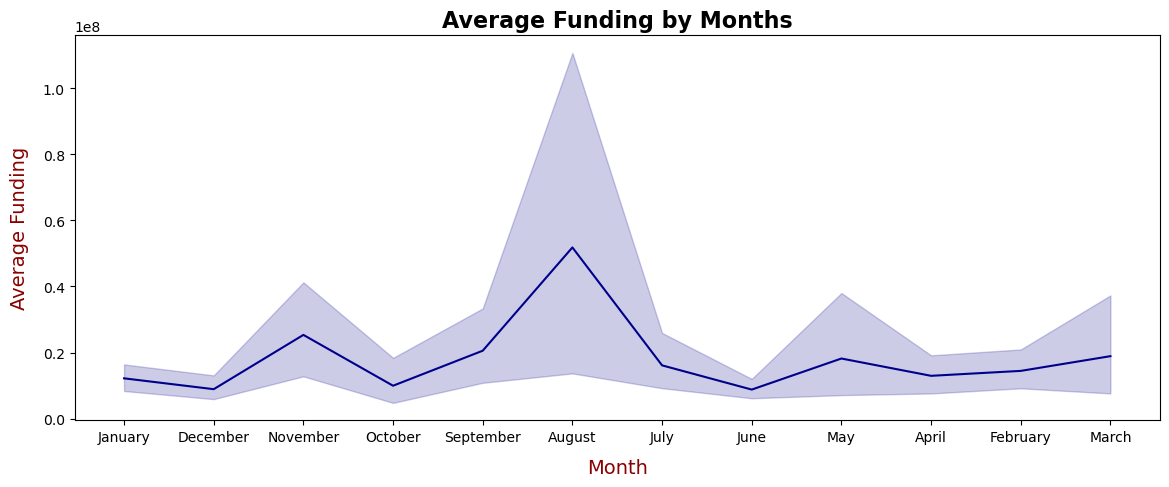

In [12]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Month', y='Funding', estimator='mean', color='darkblue')
plt.ylabel('Average Funding', color='darkred', fontsize=14, labelpad=10)
plt.xlabel('Month', color='darkred', fontsize=14, labelpad=10)
plt.title('Average Funding by Months', weight='bold', fontsize=16)
plt.show()

# What is the General Amount that Startups get in India?

In [13]:
not_india_list = ['singapore', 'san francisco', 'boston', 'missourie', 'san jose', 'burnsville', 'menlo park', 
                  'palo alto', 'santa monica', 'nairobi', 'california', 'new york']

not_india_index_list = []
for i in range(len(df['Location'])):
    if df['Location'][i] in not_india_list:
        not_india_index_list.append(i)

india_and_other_index_list = []
for i in range(len(df['Location'])):
    if type(df['Location'][i]) != float and '/' in df['Location'][i] and 'mumbai / bengaluru' != df['Location'][i]:
        india_and_other_index_list.append(i)

merged_list = not_india_index_list + india_and_other_index_list
# index_list = df.index.tolist()
only_india_index_list = []
for i in range(len(df)):
    if i not in merged_list:
        only_india_index_list.append(i)

In [14]:
only_india = df.iloc[only_india_index_list]
null_list_only_india = only_india[only_india['Location'].isnull()].index
only_india = only_india.drop(index=null_list_only_india).reset_index()
india_and_other = df.iloc[india_and_other_index_list].reset_index()
not_india = df.iloc[not_india_index_list].reset_index()

In [15]:
xx = only_india.groupby(['Year'])['Funding'].agg(['sum']) / 1000000

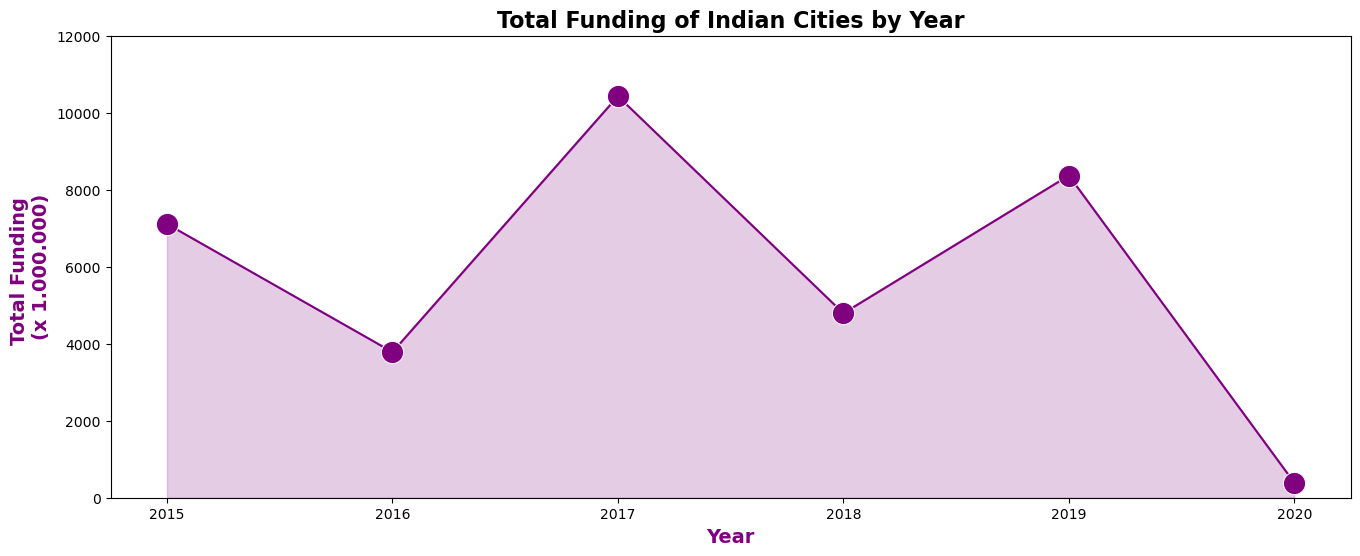

In [16]:
xx.set_index(xx.index, inplace=True)

fig, ax = plt.subplots(figsize=(16, 6))

xx.plot.area(stacked=False, ax=ax, color='purple', alpha=0.2, legend=False)
sns.lineplot(x=xx.index, y=xx['sum'], marker='o', markersize=16, color='purple', 
             ax=ax, legend=False)

plt.title('Total Funding of Indian Cities by Year', weight='bold', fontsize=16)
plt.xlabel('Year', fontsize=14, color='purple', weight='bold')
plt.ylabel('Total Funding \n(x 1.000.000)', fontsize=14, color='purple', weight='bold')
plt.ylim(0, 12000)


plt.show()

In [17]:
x = (only_india.groupby('Location')['Funding'].agg(['sum', 'count', 'mean']).sort_values(by='sum', ascending=False)[:10])
x['sum'] = (x['sum']/1000000).astype('int')
x['mean'] = (x['mean']/1000000).astype('int')

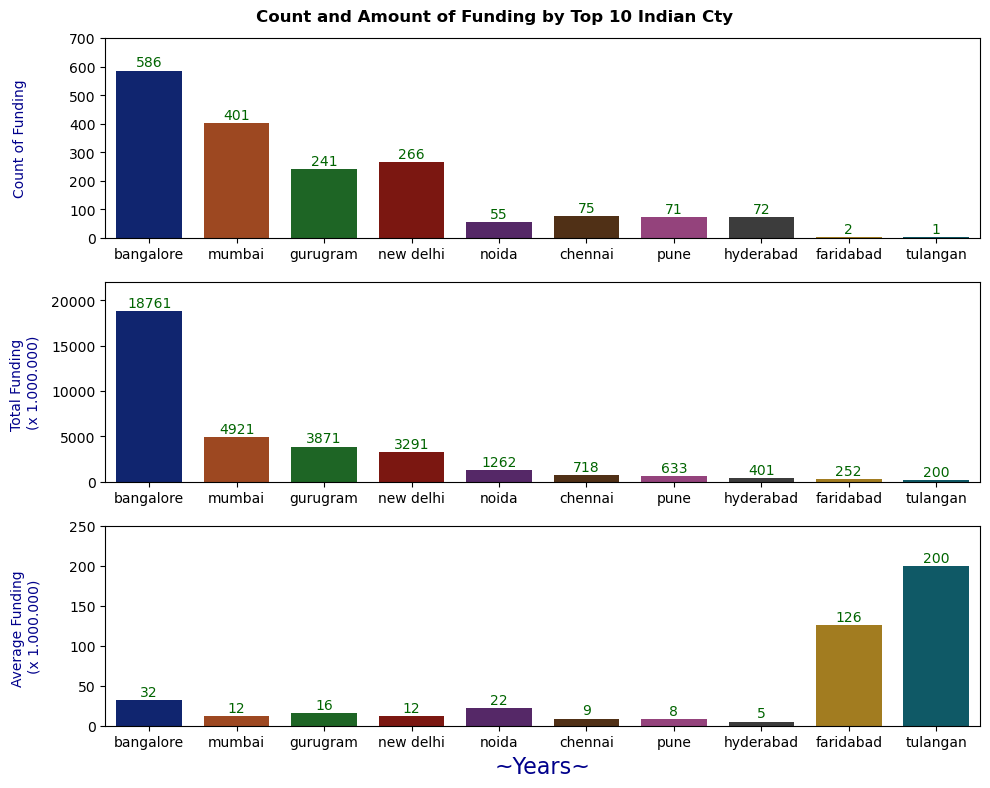

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

sns.barplot(data=x, x=x.index, y='count', ax=ax[0], width=0.75, 
            hue=x.index, palette='dark')
sns.barplot(data=x, x=x.index, y='sum', ax=ax[1], width=0.75, 
            hue=x.index, palette='dark')
sns.barplot(data=x, x=x.index, y='mean', ax=ax[2], width=0.75, 
            hue=x.index, palette='dark')

ax[0].set_xlabel('')
ax[0].set_ylabel('Count of Funding', fontsize=10, color='darkblue', labelpad=30)
ax[0].set_ylim(0, 700)
ax[1].set_xlabel('')
ax[1].set_ylabel('Total Funding \n(x 1.000.000)', fontsize=10, color='darkblue', labelpad=8)
ax[1].set_ylim(0, 22000)
ax[2].set_xlabel('~Years~', fontsize=16, color='darkblue')
ax[2].set_ylabel('Average Funding \n(x 1.000.000)', fontsize=10, color='darkblue', labelpad=20)
ax[2].set_ylim(0, 250)

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   color='darkgreen')

fig.suptitle('Count and Amount of Funding by Top 10 Indian Cty', weight='bold')
plt.tight_layout()

plt.show()

# Which Kind of Industries are more preferred for Startups?

In [19]:
top_10_vertical = df['Industry Vertical'].value_counts().head(10)
top_10_vertical

y = df.groupby('Industry Vertical')['Funding'].sum()[top_10_vertical.index]/10_000_000

top_10_vertical = pd.concat([top_10_vertical, y], axis=1).reset_index()

In [20]:
top_10_vertical

,index,Industry Vertical,Funding
0,Customer Services,604,644.125425
1,Technology,310,222.970793
2,E-Commerce,208,944.173569
3,Financial Services,77,337.854926
4,Health,57,117.290900
5,Education,44,71.500406
6,Food Industry,41,50.825119
7,Logistics,30,41.413500
8,Information Technology,13,9.721000
9,Social Media,12,156.020907


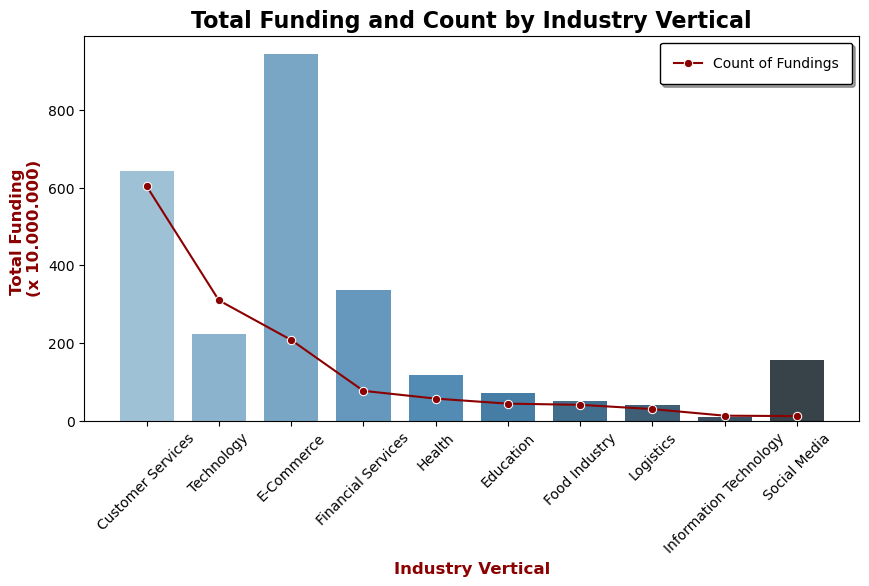

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_vertical, x='index', y='Funding', width=0.75, 
            hue='index', palette='Blues_d')
sns.lineplot(data=top_10_vertical, x='index', y='Industry Vertical', color='darkred',
             marker='o', label='Count of Fundings')

plt.legend(edgecolor='black', shadow=True, borderpad=1)
plt.ylabel('Total Funding \n(x 10.000.000)', color='darkred', fontsize=12, weight='bold')
plt.xlabel('Industry Vertical', color='darkred', fontsize=12, weight='bold')
plt.title('Total Funding and Count by Industry Vertical', weight='bold', fontsize=16)

plt.xticks(rotation=45);

# Does Location also play a role, In determining the Growth of a Startup?

In [22]:
df['Startup Name'] = df['Startup Name'].replace('ola', 'ola cabs')
df['Startup Name'] = df['Startup Name'].replace('urbanclap technologies pvt. ltd', 'urbanclap')
df['Startup Name'] = df['Startup Name'].replace('urbanladder', 'urban ladder')
df['Startup Name'] = df['Startup Name'].replace('lending kart', 'lendingkart')
df['Startup Name'] = df['Startup Name'].replace('flipkart.com', 'flipkart')
df['Startup Name'] = df['Startup Name'].replace('lenskart.com', 'lenskart')
df['Startup Name'] = df['Startup Name'].replace('vogo automotive pvt. ltd.', 'vogo')
df['Startup Name'] = df['Startup Name'].replace('samunnati financial intermediation & services pvt. ltd', 'samunnati')
df['Startup Name'] = df['Startup Name'].replace('veritas finance ltd.', 'veritas')
df['Startup Name'] = df['Startup Name'].replace('peesafe.in', 'peesafe')
df['Startup Name'] = df['Startup Name'].replace('hansel io', 'hansel.io')
df['Startup Name'] = df['Startup Name'].replace('active ai', 'active.ai')
df['Startup Name'] = df['Startup Name'].replace('doctorinsta', 'doctor insta')
df['Startup Name'] = df['Startup Name'].replace('grabhouse.com', 'grabhouse')
df['Startup Name'] = df['Startup Name'].replace('popxo.com', 'popxo')
df['Startup Name'] = df['Startup Name'].replace('bigstylist.com', 'bigstylist')
df['Startup Name'] = df['Startup Name'].replace(['earlysalary.com', 'earlysalary'], 'early salary')
df['Startup Name'] = df['Startup Name'].replace('zenify.in', 'zenify')
df['Startup Name'] = df['Startup Name'].replace('netmeds.com', 'netmeds')
df['Startup Name'] = df['Startup Name'].replace('smartivity.in', 'smartivity')
df['Startup Name'] = df['Startup Name'].replace('toppr.com', 'toppr')
df['Startup Name'] = df['Startup Name'].replace('bluegape.com', 'bluegape')
df['Startup Name'] = df['Startup Name'].replace('droom.in', 'droom')
df['Startup Name'] = df['Startup Name'].replace('logic roots', 'logicroots')
df['Startup Name'] = df['Startup Name'].replace('firstcry.com', 'firstcry')
df['Startup Name'] = df['Startup Name'].replace('naaptol.com', 'naaptol')
df['Startup Name'] = df['Startup Name'].replace('customfurnish.com', 'customfurnish')
df['Startup Name'] = df['Startup Name'].replace('icustomadeit', 'icustommadeit')
df['Startup Name'] = df['Startup Name'].replace('roposo.com', 'roposo')
df['Startup Name'] = df['Startup Name'].replace('frsh.co.in', 'frsh')
df['Startup Name'] = df['Startup Name'].replace('aisle.co', 'aisle')
df['Startup Name'] = df['Startup Name'].replace('traveltriangle', 'travel triangle')
df['Startup Name'] = df['Startup Name'].replace('wooplr.com', 'wooplr')
df['Startup Name'] = df['Startup Name'].replace('nearbuy (previously\\xc2\\xa0 groupon india)', 'nearbuy')
df['Startup Name'] = df['Startup Name'].replace('cardekho.com', 'cardekho')
df['Startup Name'] = df['Startup Name'].replace(['oyorooms', 'oyo'], 'oyo rooms')
df['Startup Name'] = df['Startup Name'].replace('ayefinance', 'aye finance')
df['Startup Name'] = df['Startup Name'].replace('dhruva space', 'dhruva')
df['Startup Name'] = df['Startup Name'].replace('vogo', 'vogo automotive')
df['Startup Name'] = df['Startup Name'].replace('paytm marketplace', 'paytm')
df['Startup Name'] = df['Startup Name'].replace('rapido bike taxi', 'rapido')
df['Startup Name'] = df['Startup Name'].replace('big basket', 'bigbasket')

In [23]:
city_list = df['Location'].value_counts().index.tolist()

india_and_others = [] 
for i in range(len(city_list)):
    if '/' in city_list[i] and 'mumbai / bengaluru' != city_list[i]:
        india_and_others.append(city_list[i])

only_india = city_list.copy()
for i in range(len(india_and_others)):
    x = only_india.index(india_and_others[i])
    del only_india[x]

only_others = ['singapore', 'san francisco', 'boston', 'missourie', 'san jose', 'burnsville', 
               'menlo park', 'palo alto', 'santa monica', 'nairobi', 'new york', 'california']

merged_list = india_and_others + only_others

for i in range(len(only_others)):
    x = only_india.index(only_others[i])
    del only_india[x]
    
# list_1 --> only_india
# list_2 --> india_and_others
# list_3 --> only_others

df['Country'] = range(len(df))

for i in range(len(df)):
    if df.loc[i, 'Location'] in only_india:
        df.loc[i, 'Country'] = 'India'
    elif df.loc[i, 'Location'] in india_and_others:
        df.loc[i, 'Country'] = 'India & Other'
    elif df.loc[i, 'Location'] in only_others:
        df.loc[i, 'Country'] = 'Others'
    else:
        df.loc[i, 'Country'] = 'unknow'

grp_countries = df.groupby('Country')['Funding'].agg(['sum', 'mean', 'count'])
grp_countries['sum']  = grp_countries['sum'] / 1_000_000
grp_countries['mean'] = grp_countries['mean'] / 1_000_000

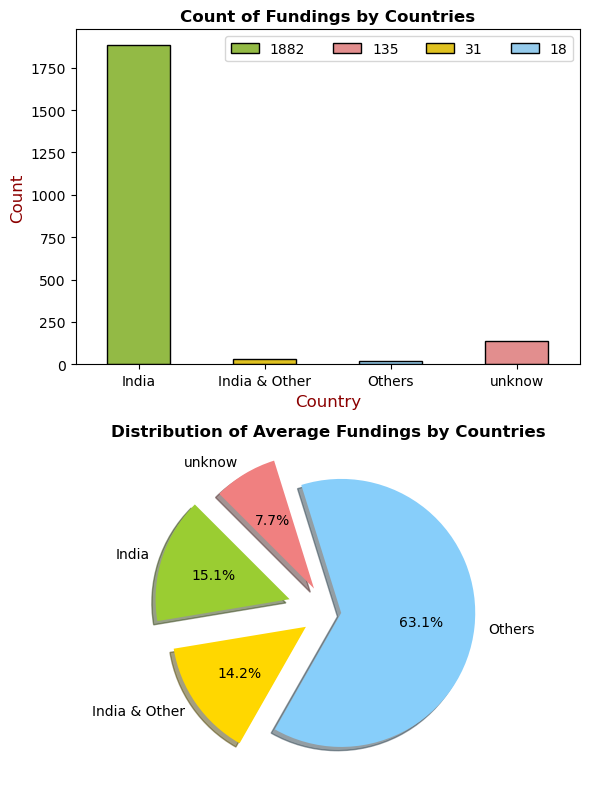

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

labels = grp_countries.index
sizes = grp_countries['mean']
explode = (0.3, 0.2, 0.1, 0.2)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colorss = ['lightskyblue', 'gold', 'lightcoral', 'yellowgreen']


sns.barplot(x=grp_countries.index, y=grp_countries['count'], ax=ax[0], width=0.5, 
            hue=grp_countries['count'], palette=colorss, edgecolor='black')
ax[1] = plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=135,
               shadow=True, colors=colors)
ax[0].set_title('Count of Fundings by Countries', weight='bold')
ax[0].set_ylabel('Count', color='darkred', fontsize=12)
ax[0].set_xlabel('Country', color='darkred', fontsize=12)
ax[0].legend(reverse=True, loc='upper right', ncol=4)

plt.title('Distribution of Average Fundings by Countries', weight='bold')


plt.tight_layout()
plt.show()

In [25]:
top_10 = df['Startup Name'].value_counts().head(10)

best_cities = []
count_list = []
for city in range(len(top_10)):
    
    x  = df.loc[df['Startup Name'] == top_10.index[city], 'Location'].unique()
    xx = df.loc[df['Startup Name'] == top_10.index[city], 'Location'].values
    
    for i in range(len(x)):
        if x[i] not in best_cities and type(x[i]) != float:
            best_cities.append(x[i])
            
    for z in range(len(xx)):
        count_list.append(xx[z])        

cities_df = pd.DataFrame()

for i in range(len(best_cities)):
    num = count_list.count(best_cities[i])
    
    df_for = pd.DataFrame({'City': best_cities[i], 'Count': num}, index=[i])
    
    cities_df = pd.concat([cities_df, df_for])
    
cities_df = cities_df.sort_values(by='Count', ascending=False)

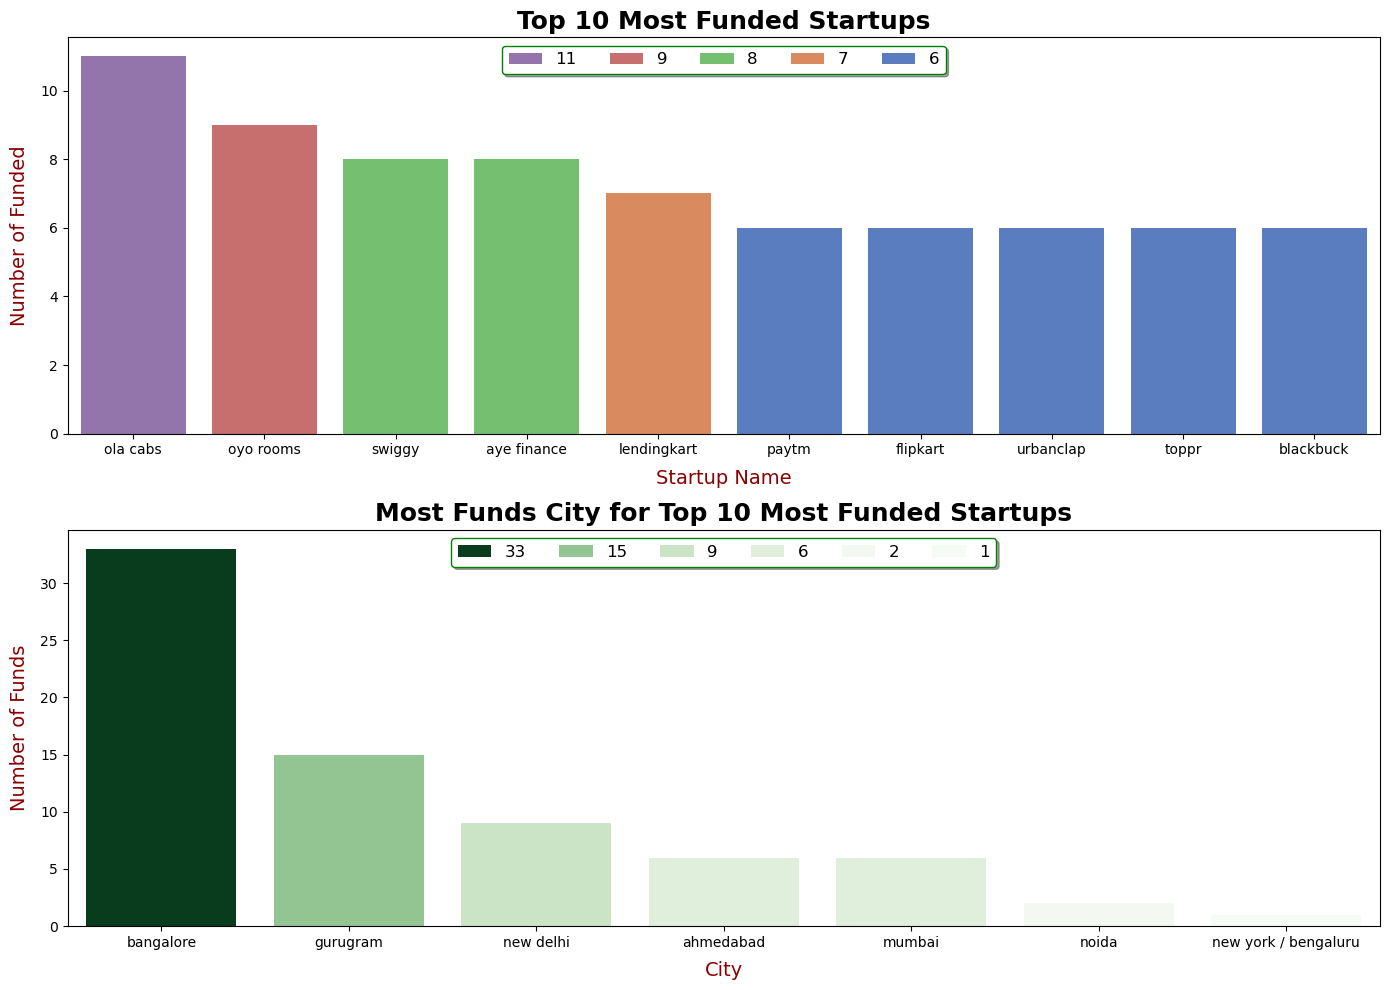

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

sns.barplot(x=top_10.index, y=top_10.values, hue=top_10.values, palette='muted', ax=ax[0])
sns.barplot(x=cities_df['City'], y=cities_df['Count'], hue=cities_df['Count'], 
            palette='Greens', ax=ax[1])

ax[0].set_title('Top 10 Most Funded Startups', fontsize=18, weight='bold')
ax[0].set_xlabel('Startup Name', color='darkred', fontsize=14, labelpad=8)
ax[0].set_ylabel('Number of Funded', color='darkred', fontsize=14, labelpad=8)
ax[0].legend(fontsize=12, ncol=5, reverse=True, loc='upper center', edgecolor='green', shadow=True)

ax[1].set_title('Most Funds City for Top 10 Most Funded Startups', fontsize=18, weight='bold')
ax[1].set_xlabel('City', color='darkred', fontsize=14, labelpad=8)
ax[1].set_ylabel('Number of Funds', color='darkred', fontsize=14, labelpad=8)
ax[1].legend(fontsize=12, ncol=6, reverse=True, loc='upper center', edgecolor='green', shadow=True)

plt.tight_layout()
plt.show()

# Who plays the main role in Indian Startups Ecosystem?

In [27]:
# top_10 = df.sort_values('Funding', ascending=False).head(10)
top_10 = df.groupby('Investors Name')[['Funding']].sum().sort_values(by='Funding', ascending=False).head(10).reset_index()
top_10 = top_10.loc[:, ['Investors Name', 'Funding']]
top_10['Investors Name'] = top_10['Investors Name'].astype('str')
top_10['Investors Name'] = top_10['Investors Name'].apply(lambda x: x.replace(', ', ',\n'))
top_10['Investors Name'] = top_10['Investors Name'].apply(lambda x: x.replace(' and ', '\nand\n'))
top_10['Investors Name'] = top_10['Investors Name'].apply(lambda x: x.replace('Vijay Shekhar Sharma', 'Vijay Shekhar\nSharma'))
top_10 = top_10.reset_index(drop=True)
top_10.loc[9, 'Investors Name'] = 'Alibaba, Foxconn,\nSoftbank'

In [28]:
# pip install squarify

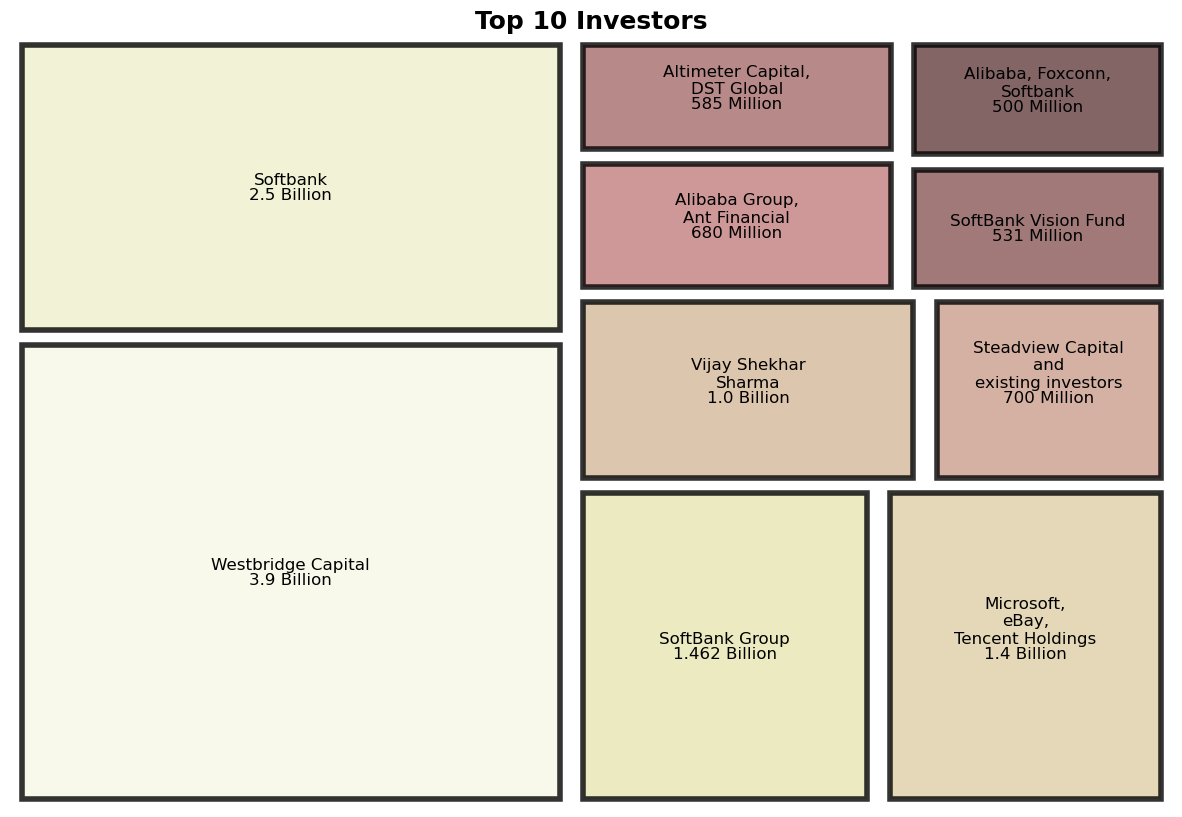

In [29]:
import squarify
plt.figure(figsize=(15, 10))
sizes = top_10['Funding']
label = top_10['Investors Name']

value = top_10['Funding']
value = value / 1_000_000
value = value.apply(lambda value: int(value))
for i in range(len(value)):
    if value[i] >= 1000:
        value[i] = str(value[i] / 1000) + ' Billion'
    else:
        value[i] = str(value[i]) + ' Million'

text_kwargs = {'fontsize': 12} 

squarify.plot(sizes=sizes, label=label, value=value, 
              color=sns.color_palette("pink_r", len(value)), 
              text_kwargs=text_kwargs, alpha=0.8, pad=True,
              bar_kwargs=dict(linewidth=4, edgecolor='black'))

plt.title('Top 10 Investors', weight='bold', fontsize=18)

plt.axis('off')
plt.show()

# What are the different Types of Funding for Startups?

In [30]:
df['Investment Type'] = df['Investment Type'].replace(['private equity', 'private equity round', 'private\\nequity', 'privateequity', 
'private', 'private funding'], 'Private Equity')

df['Investment Type'] = df['Investment Type'].replace(['seed\\nfunding', 'seed funding round', 'seed/ angel funding', 'seed / angel funding', 
'seed / angle funding', 'seed/angel funding', 'seed round', 'angel / seed funding', 'angel', 'angel round', 'seed'], 'Seed Funding')

df['Investment Type'] = df['Investment Type'].replace(['debt funding', 'debt', 'debt-funding', 'debt and preference capital', 
'structured debt', 'term loan'], 'Dept Funding')
df['Investment Type'] = df['Investment Type'].replace(['equity', 'equity based funding'], 'Equity Funding')
df['Investment Type'] = df['Investment Type'].replace('series b (extension)', 'Series B')
df['Investment Type'] = df['Investment Type'].replace('venture - series unknown', 'venture round')

df['Investment Type'] = df['Investment Type'].str.lower()
df['Investment Type'] = df['Investment Type'].astype('str')
for i in range(len(df)):
    if 'seed' in df.loc[i, 'Investment Type']:
        df.loc[i, 'Investment Type'] = 'seed funding'
        
for i in range(len(df)):
    if 'private' in df.loc[i, 'Investment Type']:
        df.loc[i, 'Investment Type'] = 'private equity'

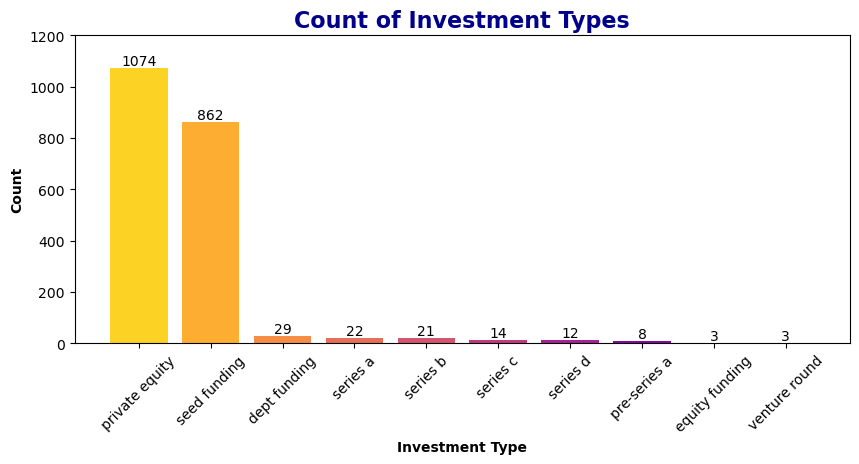

In [39]:
plt.figure(figsize=(10, 4))

data = df['Investment Type'].value_counts().head(10)
x = data.index
y = data.values

ax = plt.bar(x=x, height=y, color=sns.color_palette("plasma_r", len(x)))

plt.xticks(rotation=45)

plt.bar_label(ax, labels=y, label_type="edge")
plt.ylim((0, 1200))

plt.xlabel('Investment Type', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Count of Investment Types', weight='bold', color='darkblue', fontsize=16)

plt.show()

# Conclusions

⏩ First of all, **'private equity'** and **'seed funding'** are the most preferred Investment Type.

⏩ **Westbridge Capital** is the investor that provided the most funds in a single round. However, when we did a detailed research, we found that the most remarkable investor was **SoftBank**.

⏩ Startups with the highest number of funding are **Oya Clabs**, **Oyo Rooms**, **Swiggy**, **Aye Finance** and **Lendinkart**. And the cities that provide the most support to Startups in terms of funding are **Banglore**, **Gurugram**, **New Delhi** and **Mumbai**.

⏩ **Customer Service**, **E-Commerce** and **Financial Services** are the most preferred Vertical Sectors for investors.

⏩ Over the years, while the number of funds has decreased, the amount of funds has increased.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |